# AVIATION DATASET ANALYSIS
This analysis involves data from kaggle with information about accidents for different aircraft categories, makes, models, date, fatality, aircraft damage.

## Business Problem
Our company is entering aviation industry to operate planes for private and commercial use but the company lacks understanding of the risks involved in aircraft operations

## Objective of this analysis
Our task is to analyse the dataset and identify lowest-risk aircraft types for the company to consider.

### Load the aviation dataset with pandas
Load the dataset and import necessary libraries necessary for analysis

In [69]:
#import pandas, matplot and numpy as default aliases
import pandas as pd

import matplotlib.pyplot as plt

In [70]:
#load the dataset and set encoding to 'latin-1' and  low_memory = False
df = pd.read_csv('AviationData.csv', encoding = 'latin-1', low_memory = False)
#view first few rows of dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [71]:
#view shape
df.shape

(88889, 31)

Our dataset has 88889 rows and 31 columns

In [72]:
#identify columns present
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Not all columns are necessary for out analysis. 
Our analysis will use these columns:
   'Investigation.Type'
   'Event.Date'
   'Aircraft.Category
   'Aircraft.damage'
   

We need to find some distributions of aircraft types(Aircraft.Category) with the above columns


In [73]:
# Remove unnecessary columns
df = df[['Investigation.Type', 'Event.Date', 'Aircraft.Category', 'Aircraft.damage','Injury.Severity']]
df.columns

Index(['Investigation.Type', 'Event.Date', 'Aircraft.Category',
       'Aircraft.damage', 'Injury.Severity'],
      dtype='object')

## 1.Distribution of Aircraft category with Investigation type
### Dealing with missing Values

In [74]:
#view aircraft category column
df['Aircraft.Category']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
88884         NaN
88885         NaN
88886    Airplane
88887         NaN
88888         NaN
Name: Aircraft.Category, Length: 88889, dtype: object

We have multiple Nan values and we can remove them first

In [75]:
#identify NaN values first
df['Aircraft.Category'].isna()
nan_values_count = df['Aircraft.Category'].isna().sum()
nan_values_count

56602

We have 56602 nan values and are irrelevant as we will not know what aircraft it is hence we drop them

In [76]:
#drop all nan values
df.dropna(axis = 'index', how = 'any', subset = ['Aircraft.Category'], inplace = True)
df

,Investigation.Type,Event.Date,Aircraft.Category,Aircraft.damage,Injury.Severity
5,Accident,1979-09-17,Airplane,Substantial,Non-Fatal
7,Accident,1982-01-01,Airplane,Substantial,Non-Fatal
8,Accident,1982-01-01,Airplane,Substantial,Non-Fatal
12,Accident,1982-01-02,Airplane,Destroyed,Non-Fatal
13,Accident,1982-01-02,Airplane,Destroyed,Fatal(1)
...,...,...,...,...,...
88869,Accident,2022-12-13,Airplane,Substantial,Non-Fatal
88873,Accident,2022-12-14,Airplane,Substantial,Non-Fatal
88876,Accident,2022-12-15,Airplane,Substantial,Non-Fatal
88877,Accident,2022-12-16,Airplane,Substantial,Minor


Our rows have dropped to 32287 from 88889

In [77]:
#CONFIRM by identifying na values in Investigation.Type Column
df['Investigation.Type'].isna().sum()

0

The Investigation.Type column does not have any nan values

In [78]:
df.columns

Index(['Investigation.Type', 'Event.Date', 'Aircraft.Category',
       'Aircraft.damage', 'Injury.Severity'],
      dtype='object')

In [79]:
#our 2 necessary columns for the first distribution
df[['Investigation.Type', 'Aircraft.Category']]


,Investigation.Type,Aircraft.Category
5,Accident,Airplane
7,Accident,Airplane
8,Accident,Airplane
12,Accident,Airplane
13,Accident,Airplane
...,...,...
88869,Accident,Airplane
88873,Accident,Airplane
88876,Accident,Airplane
88877,Accident,Airplane


In [80]:
#identify counts for accidents and incidents
df['Investigation.Type'].value_counts()

Accident    30535
Incident     1752
Name: Investigation.Type, dtype: int64

### GROUP INVESTIGATION TYPES ACCORDINGLY 
We group the Investigation type to Accidents group and incidents group.
We mainly need the Accidents and not incidents as incidents may not result in harm, damage 
or injury.
We will group into Accidents group

In [86]:
#group accordingly to two groups: Accidents and Incidents
accidents_and_incidents = df.groupby('Investigation.Type')
accidents_grp = accidents_and_incidents.get_group('Accident')
accidents_grp


,Investigation.Type,Event.Date,Aircraft.Category,Aircraft.damage,Injury.Severity
5,Accident,1979-09-17,Airplane,Substantial,Non-Fatal
7,Accident,1982-01-01,Airplane,Substantial,Non-Fatal
8,Accident,1982-01-01,Airplane,Substantial,Non-Fatal
12,Accident,1982-01-02,Airplane,Destroyed,Non-Fatal
13,Accident,1982-01-02,Airplane,Destroyed,Fatal(1)
...,...,...,...,...,...
88869,Accident,2022-12-13,Airplane,Substantial,Non-Fatal
88873,Accident,2022-12-14,Airplane,Substantial,Non-Fatal
88876,Accident,2022-12-15,Airplane,Substantial,Non-Fatal
88877,Accident,2022-12-16,Airplane,Substantial,Minor


In [87]:
#view needed columns : Accident Category and investigation type
accidents_grp[['Aircraft.Category', 'Investigation.Type']]


,Aircraft.Category,Investigation.Type
5,Airplane,Accident
7,Airplane,Accident
8,Airplane,Accident
12,Airplane,Accident
13,Airplane,Accident
...,...,...
88869,Airplane,Accident
88873,Airplane,Accident
88876,Airplane,Accident
88877,Airplane,Accident


In [88]:
#identify counts for accidents for each aircraft category
accidents_grp['Aircraft.Category'].value_counts()

Airplane             25963
Helicopter            3348
Glider                 508
Balloon                229
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 12
WSFT                     9
Blimp                    4
Powered-Lift             3
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

We can see airplanes have the most accidents and ULTR have the least accidents

## Graph of investigation type and aircraft category


Text(0.5, 1.0, 'TOP 10 AIRCRAFTS WITH LEAST ACCIDENTS')

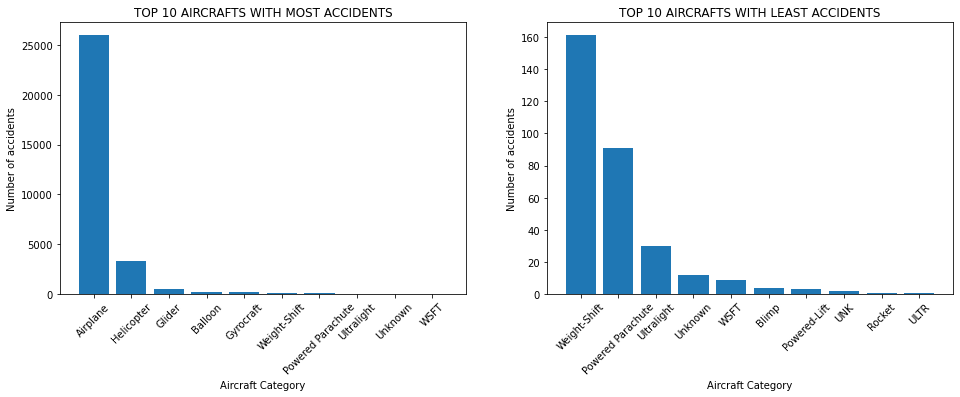

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))
accident_count_top = accidents_grp['Aircraft.Category'].value_counts().head(10)

ax1.bar(accident_count_top.index, accident_count_top.values)

ax1.tick_params(axis="x", labelrotation=45)
ax1.set_xlabel("Aircraft Category")
ax1.set_ylabel("Number of accidents")
ax1.set_title("TOP 10 AIRCRAFTS WITH MOST ACCIDENTS")

accident_count_bottom = accidents_grp['Aircraft.Category'].value_counts().tail(10)
ax2.bar(accident_count_bottom.index, accident_count_bottom.values)

ax2.tick_params(axis="x", labelrotation=45)
ax2.set_xlabel("Aircraft Category")
ax2.set_ylabel("Number of accidents")
ax2.set_title("TOP 10 AIRCRAFTS WITH LEAST ACCIDENTS")

#top 10 aircraftd with LEAST counts is the same as the BOTTOM 10 of aircrafts with most accidents
#the last 10 will have the LEAST accident counts



Airplanes and helicopters have the most accidents BUT Rockets and ULTRs have the least accidents

In [90]:
top_5_most_accidents = accident_count_top.head()
top_5_most_accidents 

Airplane      25963
Helicopter     3348
Glider          508
Balloon         229
Gyrocraft       173
Name: Aircraft.Category, dtype: int64

In [91]:
bottom_5_least_accidents = accident_count_bottom.tail(5)
bottom_5_least_accidents

Blimp           4
Powered-Lift    3
UNK             2
Rocket          1
ULTR            1
Name: Aircraft.Category, dtype: int64

#### OBSERVATIONS

The aircrafts with most accidents are Airplane, Helicopter, Glider, Balloon and Gyrocraft
The aircrafts with LEAST accidents are Blimp, Powered-Lift, UNK, Rocket, ULTR

## 2.DISTRIBUTION OF AIRCRAFT CATEORY WITH AIRCRAFT DAMAGE

In [92]:
#evaluate our shape
df.shape

(32287, 5)

In [93]:
#identify our columns
df.columns

Index(['Investigation.Type', 'Event.Date', 'Aircraft.Category',
       'Aircraft.damage', 'Injury.Severity'],
      dtype='object')

In [94]:
df[['Aircraft.Category', 'Aircraft.damage']]

,Aircraft.Category,Aircraft.damage
5,Airplane,Substantial
7,Airplane,Substantial
8,Airplane,Substantial
12,Airplane,Destroyed
13,Airplane,Destroyed
...,...,...
88869,Airplane,Substantial
88873,Airplane,Substantial
88876,Airplane,Substantial
88877,Airplane,Substantial


In [95]:
df.head()

,Investigation.Type,Event.Date,Aircraft.Category,Aircraft.damage,Injury.Severity
5,Accident,1979-09-17,Airplane,Substantial,Non-Fatal
7,Accident,1982-01-01,Airplane,Substantial,Non-Fatal
8,Accident,1982-01-01,Airplane,Substantial,Non-Fatal
12,Accident,1982-01-02,Airplane,Destroyed,Non-Fatal
13,Accident,1982-01-02,Airplane,Destroyed,Fatal(1)


In [96]:
df['Aircraft.damage'].value_counts()

Substantial    25389
Destroyed       4223
Minor           1098
Unknown          119
Name: Aircraft.damage, dtype: int64

We do not need damage values that are unkown and can group the rest of aircraft damages.

### FILTER ACCORDINGLY

We need to filter accordingly into groups of aircrafts with MOST accidents and LEAST accidents

In [97]:
df.shape

(32287, 5)

In [98]:
#create a filter to filter our data to only substantial, destroyed and minor
damages_list = ['Substantial', 'Destroyed', 'Minor']
df = df[df['Aircraft.damage'].isin(damages_list)]
df.shape

(30710, 5)

##### Substantial Filter

In [99]:
#filter further to have only top five and bottom five and compare tith damage
filt_df = df[df['Aircraft.Category'].isin(top_5_most_accidents.index) & (df['Aircraft.damage'] == 'Substantial')]
filt_df[['Aircraft.Category','Aircraft.damage']].value_counts()

Aircraft.Category  Aircraft.damage
Airplane           Substantial        21719
Helicopter         Substantial         2720
Glider             Substantial          458
Gyrocraft          Substantial          147
Balloon            Substantial           75
dtype: int64

In [100]:
#BOTTOM
bottom_filt_df = df[df['Aircraft.Category'].isin(bottom_5_least_accidents.index) & (df['Aircraft.damage'] == 'Substantial')]
bottom_filt_df[['Aircraft.Category','Aircraft.damage']].value_counts()

Aircraft.Category  Aircraft.damage
Blimp              Substantial        3
Powered-Lift       Substantial        2
ULTR               Substantial        1
dtype: int64

In [101]:
bottom_5_substantial = bottom_filt_df[['Aircraft.Category','Aircraft.damage']].value_counts()
bottom_5_substantial

Aircraft.Category  Aircraft.damage
Blimp              Substantial        3
Powered-Lift       Substantial        2
ULTR               Substantial        1
dtype: int64

In [102]:
top_5_substantial = filt_df[['Aircraft.Category','Aircraft.damage']].value_counts()
top_5_substantial

Aircraft.Category  Aircraft.damage
Airplane           Substantial        21719
Helicopter         Substantial         2720
Glider             Substantial          458
Gyrocraft          Substantial          147
Balloon            Substantial           75
dtype: int64

In [103]:
#we can add another column at the end for the values
top_5_substantial = top_5_substantial.reset_index()
top_5_substantial.columns = ['Aircraft.Category', 'Aircraft.damage', 'Count']
top_5_substantial

,Aircraft.Category,Aircraft.damage,Count
0,Airplane,Substantial,21719
1,Helicopter,Substantial,2720
2,Glider,Substantial,458
3,Gyrocraft,Substantial,147
4,Balloon,Substantial,75


In [104]:
#we can add another column at the end for the values
bottom_5_substantial = bottom_5_substantial.reset_index()
bottom_5_substantial.columns = ['Aircraft.Category', 'Aircraft.damage', 'Count']
bottom_5_substantial

,Aircraft.Category,Aircraft.damage,Count
0,Blimp,Substantial,3
1,Powered-Lift,Substantial,2
2,ULTR,Substantial,1


##### Destroyed Filter

In [105]:
filt2_df = df[df['Aircraft.Category'].isin(top_5_most_accidents.index) & (df['Aircraft.damage'] == 'Destroyed')]
top_5_destroyed = filt2_df[['Aircraft.Category','Aircraft.damage']].value_counts()
#we can add another column at the end for the values
top_5_destroyed = top_5_destroyed.reset_index()
top_5_destroyed.columns = ['Aircraft.Category', 'Aircraft.damage', 'Count']
top_5_destroyed

,Aircraft.Category,Aircraft.damage,Count
0,Airplane,Destroyed,3552
1,Helicopter,Destroyed,569
2,Glider,Destroyed,36
3,Gyrocraft,Destroyed,25
4,Balloon,Destroyed,15


In [106]:
#BOTTOM
bottom_filt2_df = df[df['Aircraft.Category'].isin(bottom_5_least_accidents.index) & (df['Aircraft.damage'] == 'Destroyed')]
bottom_5_destroyed = bottom_filt2_df[['Aircraft.Category','Aircraft.damage']].value_counts()
#we can add another column at the end for the values
bottom_5_destroyed = bottom_5_destroyed.reset_index()
bottom_5_destroyed.columns = ['Aircraft.Category', 'Aircraft.damage', 'Count']
bottom_5_destroyed


,Aircraft.Category,Aircraft.damage,Count
0,Blimp,Destroyed,1
1,Powered-Lift,Destroyed,1
2,Rocket,Destroyed,1


##### Minor Filter

In [107]:
filt3_df = df[df['Aircraft.Category'].isin(top_5_most_accidents.index) & (df['Aircraft.damage'] == 'Minor')]
top_5_minor = filt3_df[['Aircraft.Category','Aircraft.damage']].value_counts()
#we can add another column at the end for the values
top_5_minor = top_5_minor.reset_index()
top_5_minor.columns = ['Aircraft.Category', 'Aircraft.damage', 'Count']
top_5_minor

,Aircraft.Category,Aircraft.damage,Count
0,Airplane,Minor,964
1,Helicopter,Minor,65
2,Balloon,Minor,45
3,Glider,Minor,9
4,Gyrocraft,Minor,1


In [108]:
#BOTTOM
bottom_filt3_df = df[df['Aircraft.Category'].isin(bottom_5_least_accidents.index) & (df['Aircraft.damage'] == 'Minor')]
bottom_5_minor = bottom_filt3_df[['Aircraft.Category','Aircraft.damage']].value_counts()
#we can add another column at the end for the values
bottom_5_minor = bottom_5_minor.reset_index()
bottom_5_minor.columns = ['Aircraft.Category', 'Aircraft.damage', 'Count']
bottom_5_minor

,Aircraft.Category,Aircraft.damage,Count
0,Powered-Lift,Minor,1


We have a single value where the damage is minor for bottom 10 aircrafts
The only aircraft with minor damages is Powered-Lift

## DISTRIBUTION GRAPHS OF DAMAGES TO AIRCRAFT CATEGORY

#### TOP 5 AIRCRAFTS WITH MOST ACCIDENTS

Text(0, 0.5, 'Number of minor damages')

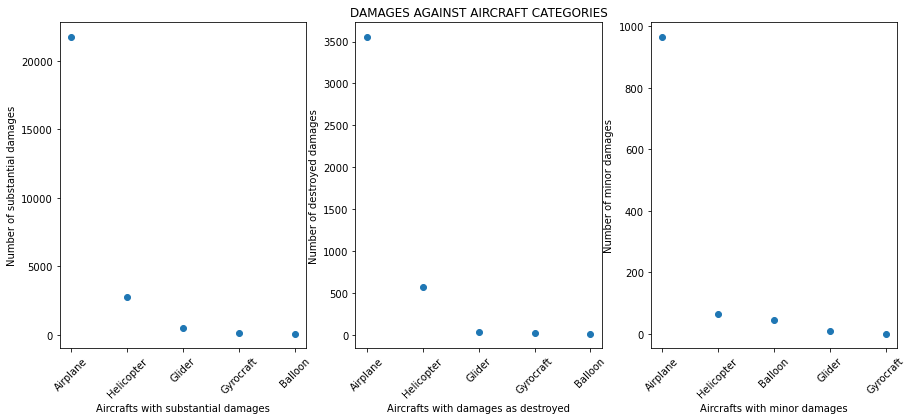

In [109]:
damages_fig, ax = plt.subplots(1, 3, figsize = (15,6))
ax[0].scatter(top_5_substantial['Aircraft.Category'], top_5_substantial['Count'])
ax[0].tick_params(axis="x", labelrotation=45)
ax[0].set_xlabel("Aircrafts with substantial damages")
ax[0].set_ylabel("Number of substantial damages")


ax[1].scatter(top_5_destroyed['Aircraft.Category'], top_5_destroyed['Count'])
ax[1].tick_params(axis="x", labelrotation=45)
ax[1].set_xlabel("Aircrafts with damages as destroyed")
ax[1].set_ylabel("Number of destroyed damages")
ax[1].set_title("DAMAGES AGAINST AIRCRAFT CATEGORIES")

ax[2].scatter(top_5_minor['Aircraft.Category'], top_5_minor['Count'])
ax[2].tick_params(axis="x", labelrotation=45)
ax[2].set_xlabel("Aircrafts with minor damages")
ax[2].set_ylabel("Number of minor damages")



#### OBSERVATIONS 

Airplanes have the most damages. They do so in terms of substantial damage, minor damage and destroyed
Balloons have the least damages

#### TOP 5 AIRCRAFTS WITH LEAST ACCIDENTS

Text(0.5, 1.0, 'DAMAGES (DESTROYED) AGAINST AIRCRAFT CATEGORIES')

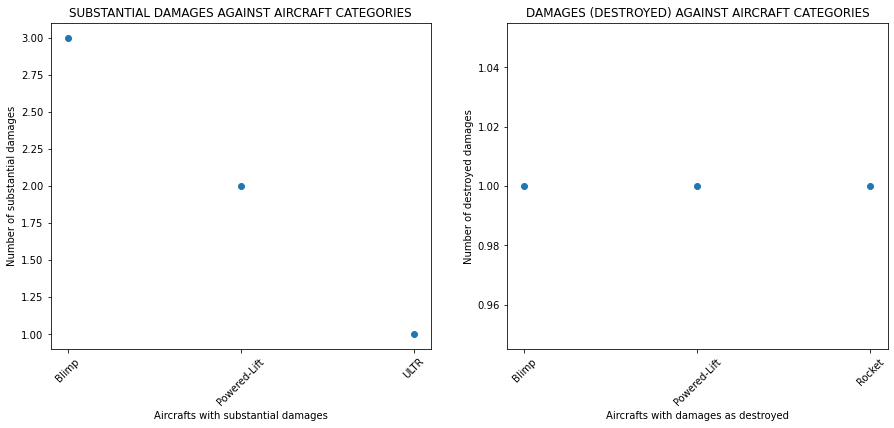

In [110]:
bottom_damages_fig, ax = plt.subplots(1, 2, figsize = (15,6))
ax[0].scatter(bottom_5_substantial['Aircraft.Category'], bottom_5_substantial['Count'])
ax[0].tick_params(axis="x", labelrotation=45)
ax[0].set_xlabel("Aircrafts with substantial damages")
ax[0].set_ylabel("Number of substantial damages")
ax[0].set_title("SUBSTANTIAL DAMAGES AGAINST AIRCRAFT CATEGORIES")


ax[1].scatter(bottom_5_destroyed['Aircraft.Category'], bottom_5_destroyed['Count'])
ax[1].tick_params(axis="x", labelrotation=45)
ax[1].set_xlabel("Aircrafts with damages as destroyed")
ax[1].set_ylabel("Number of destroyed damages")
ax[1].set_title("DAMAGES (DESTROYED) AGAINST AIRCRAFT CATEGORIES")

#### OBSERVATIONS

For aicrafts with LEAST accident count:
    Blimp has the most substantial damages while ULTR has the least
    Blimp, Powered-Lift and Rockets have the same number or destroyed status

## 3. DISTRIBUTION OF AIRCRAFT CATEGORY WITH INJURY SEVERITY

In [111]:
df.shape

(30710, 5)

##### TOP 5 AIRCRAFTS WITH MOST ACCIDENTS

We first filter to only have data with aircrafts with most accidents

In [112]:
most_accidents_filt = df['Aircraft.Category'].isin(top_5_most_accidents.index)
df = df[most_accidents_filt]

In [113]:
df.shape

(30400, 5)

In [114]:
df.columns

Index(['Investigation.Type', 'Event.Date', 'Aircraft.Category',
       'Aircraft.damage', 'Injury.Severity'],
      dtype='object')

In [115]:
df['Injury.Severity'].value_counts()

Non-Fatal      23416
Fatal           4955
Fatal(1)         435
Fatal(2)         303
Minor            200
Incident         181
Serious          142
Fatal(3)         115
Fatal(4)          85
Fatal(5)          27
Fatal(6)          24
Unavailable       22
Fatal(7)          14
Fatal(8)          13
Fatal(10)          7
Fatal(12)          5
Fatal(14)          3
Fatal(13)          3
Fatal(154)         2
Fatal(24)          1
Fatal(20)          1
Fatal(26)          1
Fatal(65)          1
Fatal(19)          1
Fatal(169)         1
Fatal(113)         1
Fatal(131)         1
Fatal(228)         1
Fatal(18)          1
Fatal(9)           1
Fatal(35)          1
Fatal(125)         1
Fatal(160)         1
Fatal(54)          1
Fatal(16)          1
Fatal(27)          1
Fatal(17)          1
Fatal(11)          1
Fatal(97)          1
Name: Injury.Severity, dtype: int64

In [116]:
df.shape

(30400, 5)

In [117]:
df = df.dropna(axis = 'index', how = 'any', subset = ['Injury.Severity'])
df.shape

(29972, 5)

In [118]:
#drop unavailable values
unavailable_filt = df['Injury.Severity'] == 'Unavailable'
df.drop(index = df[unavailable_filt].index)
df.shape

(29972, 5)

### Group the different types of fatalities

In [119]:
df['Injury.Severity'].value_counts().sort_values(ascending = False)

Non-Fatal      23416
Fatal           4955
Fatal(1)         435
Fatal(2)         303
Minor            200
Incident         181
Serious          142
Fatal(3)         115
Fatal(4)          85
Fatal(5)          27
Fatal(6)          24
Unavailable       22
Fatal(7)          14
Fatal(8)          13
Fatal(10)          7
Fatal(12)          5
Fatal(14)          3
Fatal(13)          3
Fatal(154)         2
Fatal(9)           1
Fatal(11)          1
Fatal(17)          1
Fatal(27)          1
Fatal(16)          1
Fatal(54)          1
Fatal(160)         1
Fatal(125)         1
Fatal(35)          1
Fatal(24)          1
Fatal(18)          1
Fatal(228)         1
Fatal(131)         1
Fatal(113)         1
Fatal(169)         1
Fatal(19)          1
Fatal(65)          1
Fatal(26)          1
Fatal(20)          1
Fatal(97)          1
Name: Injury.Severity, dtype: int64

In [120]:
df['Injury.Severity'].value_counts().index.sort_values(ascending = False)

Index(['Unavailable', 'Serious', 'Non-Fatal', 'Minor', 'Incident', 'Fatal(97)',
       'Fatal(9)', 'Fatal(8)', 'Fatal(7)', 'Fatal(65)', 'Fatal(6)',
       'Fatal(54)', 'Fatal(5)', 'Fatal(4)', 'Fatal(35)', 'Fatal(3)',
       'Fatal(27)', 'Fatal(26)', 'Fatal(24)', 'Fatal(228)', 'Fatal(20)',
       'Fatal(2)', 'Fatal(19)', 'Fatal(18)', 'Fatal(17)', 'Fatal(169)',
       'Fatal(160)', 'Fatal(16)', 'Fatal(154)', 'Fatal(14)', 'Fatal(131)',
       'Fatal(13)', 'Fatal(125)', 'Fatal(12)', 'Fatal(113)', 'Fatal(11)',
       'Fatal(10)', 'Fatal(1)', 'Fatal'],
      dtype='object')

Above are the fatalities recorded per accident

Group them to a single list of fatalities greater than 0, Non-fatal, Minor together with incident,
and serious

Once grouped we can group them further to only have the values for top 5 accidents

In [121]:
df.shape

(29972, 5)

#### FATALITIES GROUP  1 (TOP 5 AIRCRAFTS WITH MOST ACCIDENTS)

In [122]:
# we can filter to have  various groups of fatalitites together

#filter for fatalities above one
fatalitites_list = ['Fatal(97)', 'Fatal(9)','Fatal(8)', 'Fatal(7)', 'Fatal(65)', 'Fatal(6)',
                    'Fatal(54)',
                    'Fatal(5)', 'Fatal(4)', 'Fatal(35)', 'Fatal(3)', 'Fatal(27)',
                    'Fatal(26)', 'Fatal(24)', 'Fatal(228)', 'Fatal(20)', 'Fatal(2)',
                    'Fatal(19)', 'Fatal(18)', 'Fatal(17)', 'Fatal(169)', 'Fatal(160)',
                    'Fatal(16)', 'Fatal(154)', 'Fatal(14)', 'Fatal(131)', 'Fatal(13)',
                    'Fatal(125)', 'Fatal(12)', 'Fatal(113)', 'Fatal(11)', 'Fatal(10)']

fatalities_filt = (df['Injury.Severity'].isin(fatalitites_list))
fatalities_df = df[fatalities_filt]
fatalities_df[['Aircraft.Category','Injury.Severity']].value_counts()


Aircraft.Category  Injury.Severity
Airplane           Fatal(2)           278
                   Fatal(3)            90
                   Fatal(4)            76
                   Fatal(5)            26
Helicopter         Fatal(3)            24
                   Fatal(2)            24
Airplane           Fatal(6)            21
                   Fatal(7)            13
                   Fatal(8)            13
Helicopter         Fatal(4)             8
Airplane           Fatal(10)            7
                   Fatal(12)            4
Helicopter         Fatal(6)             3
                   Fatal(14)            2
Airplane           Fatal(154)           2
                   Fatal(13)            2
Helicopter         Fatal(13)            1
Gyrocraft          Fatal(2)             1
Balloon            Fatal(4)             1
                   Fatal(3)             1
Airplane           Fatal(97)            1
                   Fatal(9)             1
Helicopter         Fatal(5)             1

In [123]:
airplane_fatalities_filt = fatalities_df['Aircraft.Category'] == 'Airplane'
airplane_fatalities = fatalities_df[airplane_fatalities_filt]
airplane_fatalities['Injury.Severity'].value_counts()

Fatal(2)      278
Fatal(3)       90
Fatal(4)       76
Fatal(5)       26
Fatal(6)       21
Fatal(8)       13
Fatal(7)       13
Fatal(10)       7
Fatal(12)       4
Fatal(13)       2
Fatal(154)      2
Fatal(17)       1
Fatal(169)      1
Fatal(113)      1
Fatal(26)       1
Fatal(19)       1
Fatal(65)       1
Fatal(20)       1
Fatal(24)       1
Fatal(14)       1
Fatal(131)      1
Fatal(18)       1
Fatal(27)       1
Fatal(9)        1
Fatal(228)      1
Fatal(35)       1
Fatal(125)      1
Fatal(11)       1
Fatal(160)      1
Fatal(54)       1
Fatal(16)       1
Fatal(97)       1
Name: Injury.Severity, dtype: int64

We can now graph fatalities for airplanes

Text(0.5, 1.0, 'AIRPLANE FATALITIES')

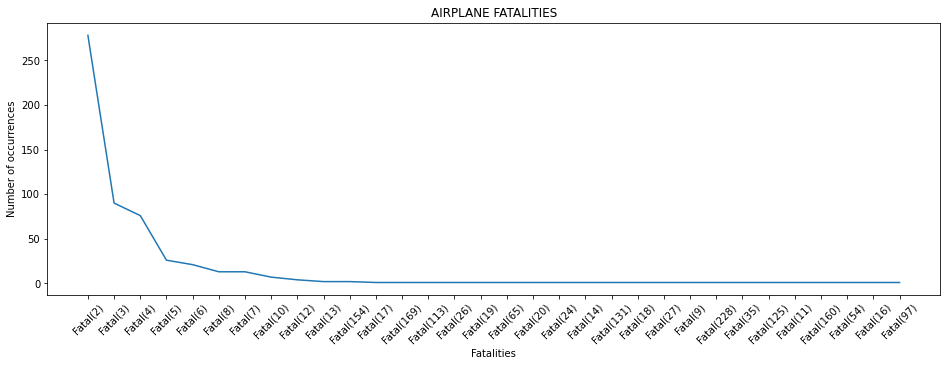

In [124]:
airplane_fatalities_fig, ax = plt.subplots(figsize=(16, 5))
top_10_airplane_fatalities = airplane_fatalities['Injury.Severity'].value_counts()

ax.plot(top_10_airplane_fatalities.index, top_10_airplane_fatalities.values)

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Fatalities")
ax.set_ylabel("Number of occurrences")
ax.set_title("AIRPLANE FATALITIES")


In [125]:
top_10_airplane_fatalities.values.mean()

17.28125

Airplanes have the highest count of occurences of fatalities with the highest fatalities count 
to be 228


Text(0.5, 1.0, 'HELICOPTER FATALITIES')

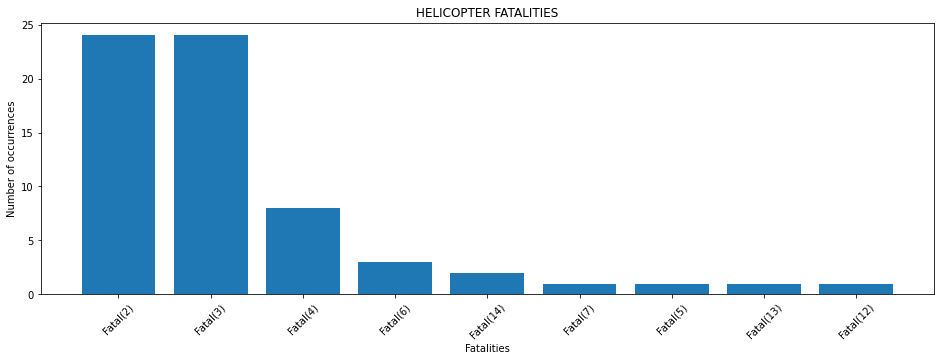

In [126]:
helicopter_fatalities_filt = fatalities_df['Aircraft.Category'] == 'Helicopter'
helicopter_fatalities = fatalities_df[helicopter_fatalities_filt]
#helicopter_fatalities['Injury.Severity'].value_counts()

helicopter_fatalities_fig, ax = plt.subplots(figsize=(16, 5))
helicopter_fatalities = helicopter_fatalities['Injury.Severity'].value_counts()

ax.bar(helicopter_fatalities.index, helicopter_fatalities.values)

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Fatalities")
ax.set_ylabel("Number of occurrences")
ax.set_title("HELICOPTER FATALITIES")

In [127]:
helicopter_fatalities.values.mean() 

7.222222222222222

#### OBSERVATIONS

Occurence count for fatalities in helicpters is less than 30
Highest fatality is 13

In [128]:
glider_fatalities_filt = fatalities_df['Aircraft.Category'] == 'Glider'
glider_fatalities = fatalities_df[glider_fatalities_filt]
glider_fatalities['Injury.Severity'].value_counts()
glider_fatalities.shape

(0, 5)

We don't have any fatalities for Gliders

In [129]:
balloon_fatalities_filt = fatalities_df['Aircraft.Category'] == 'Balloon'
balloon_fatalities = fatalities_df[balloon_fatalities_filt]
balloon_fatalities['Injury.Severity'].value_counts()


Fatal(3)    1
Fatal(4)    1
Name: Injury.Severity, dtype: int64

Balloons have a total of 2 accidents with 3 and 4 fatalities

Text(0.5, 1.0, 'BALLOON FATALITIES')

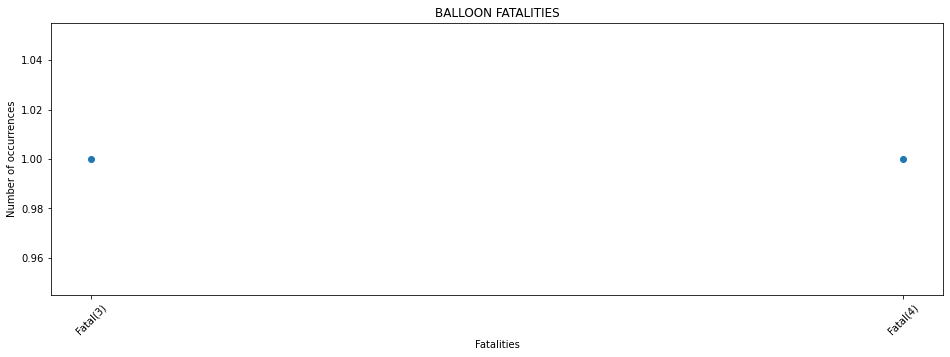

In [130]:
balloon_fatalities_fig, ax = plt.subplots(figsize=(16, 5))
balloon_fatalities_counts = balloon_fatalities['Injury.Severity'].value_counts()

ax.scatter(balloon_fatalities_counts.index, balloon_fatalities_counts.values)

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Fatalities")
ax.set_ylabel("Number of occurrences")
ax.set_title("BALLOON FATALITIES")

#### OBSERVATIONS

Balloons have a total of 2 accidents with 3 and 4 fatalities

In [131]:
gyrocraft_fatalities_filt = fatalities_df['Aircraft.Category'] == 'Gyrocraft'
gyrocraft_fatalities = fatalities_df[gyrocraft_fatalities_filt]
gyrocraft_fatalities['Injury.Severity'].value_counts()

Fatal(2)    1
Name: Injury.Severity, dtype: int64

Gyrocrafts have a single accident with 2 fatalities

Text(0.5, 1.0, 'GYROCRAFT FATALITIES')

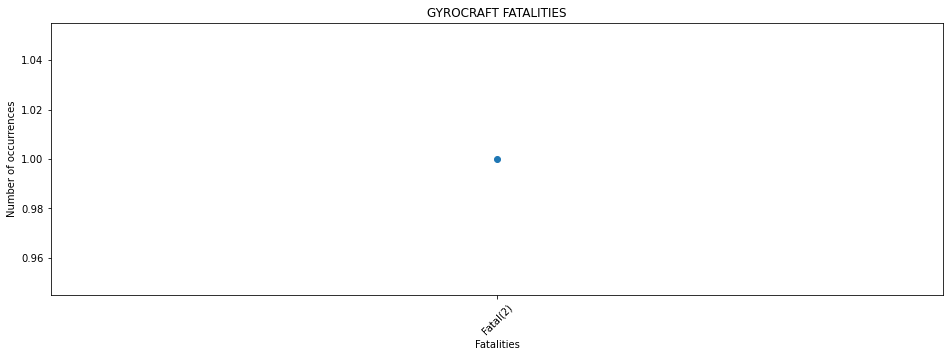

In [132]:
gyrocraft_fatalities_fig, ax = plt.subplots(figsize=(16, 5))
gyrocraft_fatalities_counts = gyrocraft_fatalities['Injury.Severity'].value_counts()

ax.scatter(gyrocraft_fatalities_counts.index,gyrocraft_fatalities_counts.values)

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Fatalities")
ax.set_ylabel("Number of occurrences")
ax.set_title("GYROCRAFT FATALITIES")

#### OBSERVATIONS 

Gyrocrafts have a single accident with 2 fatalities

In [133]:
df['Aircraft.Category'].value_counts()

Airplane      25860
Helicopter     3301
Glider          503
Gyrocraft       173
Balloon         135
Name: Aircraft.Category, dtype: int64

##### TOP 5 AIRCRAFTS WITH LEAST ACCIDENTS

In [134]:
least_accidents_filt = df['Aircraft.Category'].isin(bottom_5_least_accidents.index)
least_accidents_df = df[least_accidents_filt]
least_accidents_df.shape

(0, 5)

We have zero rows of aircrafts with the LEAST accident count

#### FATALITIES GROUP 2 (NON-FATAL, SERIOUS,MINOR AND INCIDENT)

Group all the rest of injuries as a single non-fatal list.

In [135]:
#create non fatal injuries list
non_fatal_injuries = ['Serious', 'Non-Fatal', 'Minor', 'Incident']

In [136]:
#filter our dataframe to analyse non fatal injuries
non_fatal_filter = df['Injury.Severity'].isin(non_fatal_injuries)
non_fatal_df = df[non_fatal_filter]
non_fatal_df['Injury.Severity'].value_counts()

Non-Fatal    23416
Minor          200
Incident       181
Serious        142
Name: Injury.Severity, dtype: int64

As we can see we have 23416 Non-Fatal, 200 Minor , 181 Incident, 142 Serious Injuries.     

In [137]:
non_fatal_df

,Investigation.Type,Event.Date,Aircraft.Category,Aircraft.damage,Injury.Severity
5,Accident,1979-09-17,Airplane,Substantial,Non-Fatal
7,Accident,1982-01-01,Airplane,Substantial,Non-Fatal
8,Accident,1982-01-01,Airplane,Substantial,Non-Fatal
12,Accident,1982-01-02,Airplane,Destroyed,Non-Fatal
16,Accident,1982-01-02,Helicopter,Destroyed,Non-Fatal
...,...,...,...,...,...
88869,Accident,2022-12-13,Airplane,Substantial,Non-Fatal
88873,Accident,2022-12-14,Airplane,Substantial,Non-Fatal
88876,Accident,2022-12-15,Airplane,Substantial,Non-Fatal
88877,Accident,2022-12-16,Airplane,Substantial,Minor


##### TOP 5 AIRCRAFTS WITH  MOST ACCIDENTS

In [138]:
#apply a filter to generate only aircrafts in the list of top 5 aircrafts with MOST accidents
non_fatal_airplane_filt = (non_fatal_df['Aircraft.Category'] == 'Airplane') | (non_fatal_df['Aircraft.Category'] == 'Helicopter')| (non_fatal_df['Aircraft.Category'] == 'Glider') | (non_fatal_df['Aircraft.Category'] == 'Balloon') | (non_fatal_df['Aircraft.Category'] == 'Gyrocraft')    
non_fatal_airplane = non_fatal_df[non_fatal_airplane_filt]
non_fatal_airplane['Aircraft.Category'].value_counts()


Airplane      20740
Helicopter     2522
Glider          418
Gyrocraft       136
Balloon         123
Name: Aircraft.Category, dtype: int64

Text(0.5, 1.0, 'NON FATALITIES DISTRIBUTION')

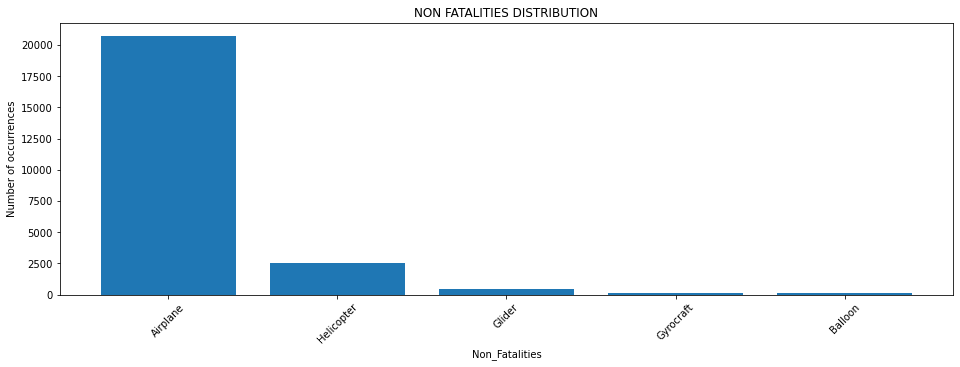

In [139]:
non_fatalities_fig, ax = plt.subplots(figsize=(16, 5))
non_fatalities = non_fatal_airplane['Aircraft.Category'].value_counts().head(10)

ax.bar(non_fatalities.index, non_fatalities.values)

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Non_Fatalities")
ax.set_ylabel("Number of occurrences")
ax.set_title("NON FATALITIES DISTRIBUTION")


#### OBSERVATIONS

Airplanes have the highest non fatalities occurrence of more than the other aicrafts 

##### TOP 5 AIRCRAFTS WITH LEAST ACCIDENTS

We are goint to use the top 5 aircafts with the LEAST accidents.

In [140]:
#view top aircrafts with LEAST accidents
bottom_5_least_accidents.index

Index(['Blimp', 'Powered-Lift', 'UNK', 'Rocket', 'ULTR'], dtype='object')

In [141]:
non_fatal_airplane_filt_bottom = (non_fatal_df['Aircraft.Category'] == 'Blimp') | (non_fatal_df['Aircraft.Category'] == 'Powered-Lift ')| (non_fatal_df['Aircraft.Category'] == 'UNK') | (non_fatal_df['Aircraft.Category'] == 'Rocket') | (non_fatal_df['Aircraft.Category'] == 'ULTR')    
non_fatal_airplane_bottom = non_fatal_df[non_fatal_airplane_filt_bottom]
non_fatal_airplane_bottom['Aircraft.Category'].value_counts()
non_fatal_airplane_bottom.shape

(0, 5)

We have zero rows of Aircrafts with the least accidents. This is in comparison with the list of
the bottom 10 with most accidents. This indicates that all accidents for Blimp, Powered-Lift, UNK, Rocket, ULTR are FATAL.

# FINDINGS
The aircrafts with most accidents are Airplane, Helicopter, Glider, Balloon and Gyrocraft
The aircrafts with LEAST accidents are Blimp, Powered-Lift, UNK, Rocket, ULTR
Airplanes have the most damages. They do so in terms of substantial damage, minor damage and destroyed
Balloons have the least damages
For aicrafts with LEAST accident count:
    Blimp has the most substantial damages while ULTR has the least
    Blimp, Powered-Lift and Rockets have the same number or destroyed status

Airplanes have the highest count of occurences of fatalities with the highest fatalities count 
to be 228
2 or 3 fatalities in a crash are the most occurrent with upto counts of 250 in occurrence

Occurence count for fatalities in helicpters is less than 30
Highest fatality is 13

Balloons have a total of 2 accidents with 3 and 4 fatalities

Gyrocrafts have a single accident with 2 fatalities

Airplanes have the highest non fatalities occurrence of more than the other aicrafts(above 20000)
Followed by helicopters, glider, gyrocraft and balloon


## CONCLUSION

Airplanes have the highest fatality occurrences with an average of 17 followed by helicopters 
with an average fatality occurrence count of 7. They however also have the highest count of non fatalities followed by helicopters. Airplane count is up to 9 times of helicopter count.

Aircrafts with least numbers of accidents DO NOT have any non fatalities values indicating all accidents are fatal

Hence, I would recommend Airplanes for entry into business as this is the aircraft with the highest number of non fatalities, hence quite safe for consumers.
The risk being considered here is in terms of the non-fatalities

If the risk being considered is in terms of damages I would reccommend balloons as the have the least
damages while airplanes have the most however accidents here result in fatalities only